In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.metrics import f1_scoreaccuracy_score

In [26]:
train = pd.read_csv('train_clean.csv')
test = pd.read_csv('test_clean.csv')

In [27]:
train.isnull().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Sex_M            0
dtype: int64

In [28]:
train = train.drop('ID', axis=1)
test = test.drop('ID', axis=1)

In [29]:
X = train.drop('Stage', axis=1)
y = train['Stage']

In [31]:
# Split the data into 30% validation and 70% training
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

In [32]:
model=CatBoostClassifier(iterations=800,
                              learning_rate=0.1,
                              depth=4,loss_function='MultiClass', 
                         bootstrap_type='Bernoulli',
                              subsample=0.9,
                              eval_metric='TotalF1',
                              metric_period=20,
                              allow_writing_files=False)

In [33]:
model.fit(X_train, y_train, eval_set=(X_val, y_val))

0:	learn: 0.3521026	test: 0.3521094	best: 0.3521094 (0)	total: 10ms	remaining: 8.02s
20:	learn: 0.3507487	test: 0.3509068	best: 0.3521094 (0)	total: 146ms	remaining: 5.41s
40:	learn: 0.3507487	test: 0.3509068	best: 0.3521094 (0)	total: 306ms	remaining: 5.66s
60:	learn: 0.3507487	test: 0.3509068	best: 0.3521094 (0)	total: 442ms	remaining: 5.35s
80:	learn: 0.3516847	test: 0.3509068	best: 0.3521094 (0)	total: 584ms	remaining: 5.18s
100:	learn: 0.3548960	test: 0.3522216	best: 0.3522216 (100)	total: 717ms	remaining: 4.96s
120:	learn: 0.3590556	test: 0.3517788	best: 0.3522216 (100)	total: 859ms	remaining: 4.82s
140:	learn: 0.3631609	test: 0.3517814	best: 0.3522216 (100)	total: 995ms	remaining: 4.65s
160:	learn: 0.3708179	test: 0.3539323	best: 0.3539323 (160)	total: 1.14s	remaining: 4.5s
180:	learn: 0.3784458	test: 0.3557032	best: 0.3557032 (180)	total: 1.27s	remaining: 4.35s
200:	learn: 0.3878435	test: 0.3530046	best: 0.3557032 (180)	total: 1.41s	remaining: 4.21s
220:	learn: 0.4011621	test: 

In [34]:
y_pred=model.predict(test)

In [36]:
print(f1_score(y_val, model.predict(X_val), average='micro'))

0.5029411764705882


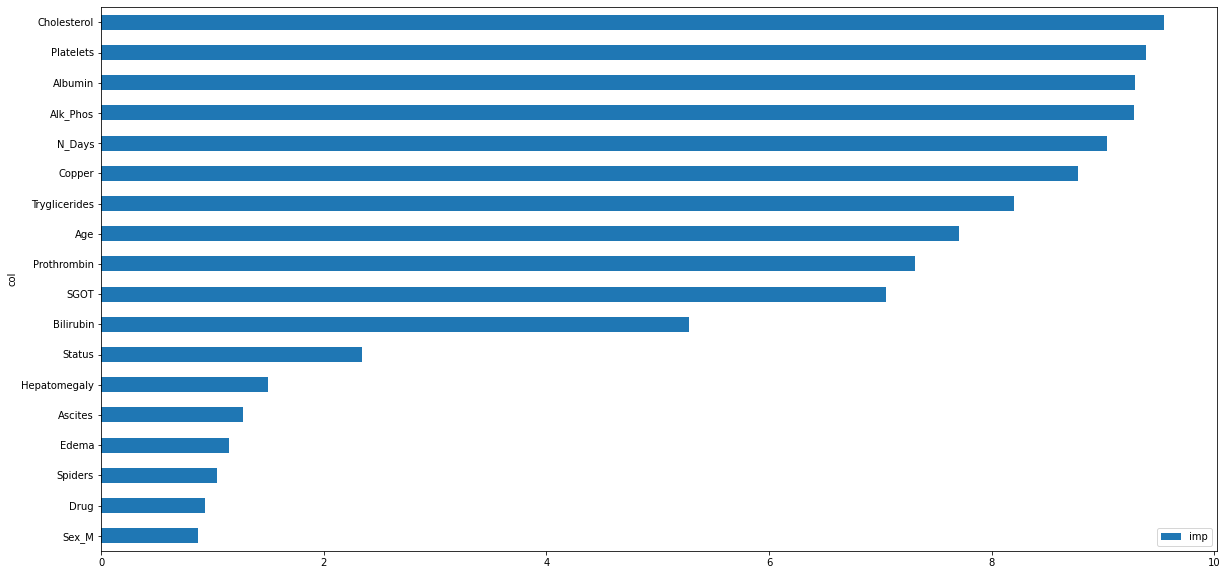

In [19]:
fea_imp = pd.DataFrame({'imp':model.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
plt.savefig('catboost_feature_importance.png')    

In [20]:
pred = model.predict(test)

In [21]:
res = pd.DataFrame(pred) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["Stage"]

In [22]:
res['Stage'].value_counts()

4.0    2890
2.0     205
3.0     104
1.0       1
Name: Stage, dtype: int64

In [23]:
res.to_csv('prediction_results.csv', index=False)